In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install apyori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from apyori import apriori
import numpy as np

# Load data
data = pd.read_csv('/content/drive/MyDrive/warmindo_free_ngulikdata.csv')
encoding = 'latin-1'

# 1. Praprosesing data
data.fillna(method='ffill', inplace=True)

# 2. konversi data tanggal
def split_date(x):
    parts = x.split("-")
    if len(parts) == 3:
        return parts[0], parts[1], parts[2]
    else:
        return None, None, None

data[['Year', 'Month', 'Day']] = data['tanggal_transaksi'].apply(lambda x: pd.Series(split_date(x)))

# Year (ingat kembali penulisan function lambda)
data['Month'] = data['tanggal_transaksi'].apply(lambda x: x.split("/")[0] if len(x.split("/")) > 0 else None)
data['Day'] = data['tanggal_transaksi'].apply(lambda x: x.split("/")[1] if len(x.split("/")) > 1 else None)
data['Year'] = data['tanggal_transaksi'].apply(lambda x: x.split("/")[2] if len(x.split("/")) > 2 else None)

# konversi quantity, harga jual, nilai penjualan
for col in ['quantity', 'harga_jual', 'nilai_penjualan']:
    data[col] = pd.to_numeric(data[col])

# 3. hapus data duplikat
data.drop_duplicates(inplace=True)

# 4. Normalisasi data
data['harga_jual'] = (data['harga_jual'] - data['harga_jual'].min()) / (data['harga_jual'].max() - data['harga_jual'].min())

# 5. ekstraksi fitur
data['total_revenue'] = data['quantity'] * data['harga_jual']

# 6. transformasi data
data = pd.get_dummies(data, columns=['jenis_produk', 'kategori_produk', 'jenis_pembayaran', 'jenis_pesanan'])

print(data)

      id  invoice_id tanggal_transaksi  customer_id               nama_produk  \
0      1           1           4/11/22           44      Indomie Ayam Spesial   
1      2           2            8/1/22           10      Indomie Ayam Spesial   
2      3           3            4/3/22           62  Indomie Rasa Soto Betawi   
3      4           4           3/19/22           48  Indomie Rasa Soto Padang   
4      5           5           4/29/22           87   Indomie Rasa Sop Buntut   
..   ...         ...               ...          ...                       ...   
494  495         495           5/17/22           11         Indomie Baso Sapi   
495  496         496            6/6/22           55    Indomie Goreng Spesial   
496  497         497           7/14/22           25    Indomie Goreng Rendang   
497  498         498           8/22/22           39      Indomie Goreng Pedas   
498  499         499           6/21/22           79          Indomie Soto Mie   

     quantity  harga_jual  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(data.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  499 non-null    int64  
 1   invoice_id          499 non-null    int64  
 2   tanggal_transaksi   499 non-null    object 
 3   customer_id         499 non-null    int64  
 4   nama_produk         499 non-null    object 
 5   quantity            499 non-null    int64  
 6   harga_jual          499 non-null    float64
 7   nilai_penjualan     499 non-null    int64  
 8   Year                499 non-null    object 
 9   Month               499 non-null    object 
 10  Day                 499 non-null    object 
 11  total_revenue       499 non-null    float64
 12  jenis_produk_1      499 non-null    bool   
 13  jenis_produk_2      499 non-null    bool   
 14  kategori_produk_1   499 non-null    bool   
 15  jenis_pembayaran_1  499 non-null  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(data.head(10))

First Ten Rows of the DataFrame: 

   id  invoice_id tanggal_transaksi  customer_id               nama_produk  \
0   1           1           4/11/22           44      Indomie Ayam Spesial   
1   2           2            8/1/22           10      Indomie Ayam Spesial   
2   3           3            4/3/22           62  Indomie Rasa Soto Betawi   
3   4           4           3/19/22           48  Indomie Rasa Soto Padang   
4   5           5           4/29/22           87   Indomie Rasa Sop Buntut   
5   6           6           7/23/22           80      Indomie Ayam Spesial   
6   7           7            2/4/22           15         Indomie Baso Sapi   
7   8           8            1/8/22           94   Indomie Rasa Sop Buntut   
8   9           9            1/3/22            6          Indomie Soto Mie   
9  10          10           6/11/22           86   Indomie Goreng Cabe Ijo   

   quantity  harga_jual  nilai_penjualan Year Month  ... jenis_produk_2  \
0         2         0.0        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print('Unique Items: ', data['nama_produk'].nunique())

Unique Items:  18


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', data['nama_produk'].nunique())
print( '\n', data['nama_produk'].unique())

Unique Items:  18

 ['Indomie Ayam Spesial' 'Indomie Rasa Soto Betawi'
 'Indomie Rasa Soto Padang' 'Indomie Rasa Sop Buntut' 'Indomie Baso Sapi'
 'Indomie Soto Mie' 'Indomie Goreng Cabe Ijo' 'Indomie Goreng Aceh'
 'Indomie Goreng Sambal Matah' 'Indomie Rasa Mi Kocok Bandung'
 'Indomie Goreng Spesial' 'Indomie Rasa Soto Banjar Limau Kuit'
 'Indomie Goreng Pedas' 'indomie Kari Ayam' 'Indomie Goreng Rendang'
 'indomie Ayam Bawang' 'Indomie Rasa Soto Lamongan'
 'Indomie Rasa Empal Gentong']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Cek missing value dan zeros
print(data.isnull().sum().sort_values(ascending=False))

id                    0
jenis_produk_1        0
jenis_pesanan_1       0
jenis_pembayaran_6    0
jenis_pembayaran_5    0
jenis_pembayaran_4    0
jenis_pembayaran_3    0
jenis_pembayaran_2    0
jenis_pembayaran_1    0
kategori_produk_1     0
jenis_produk_2        0
total_revenue         0
invoice_id            0
Day                   0
Month                 0
Year                  0
nilai_penjualan       0
harga_jual            0
quantity              0
nama_produk           0
customer_id           0
tanggal_transaksi     0
jenis_pesanan_2       0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# cek nilai "NONE" pada kolom Item
print(data[data['nama_produk']=='NONE'])

Empty DataFrame
Columns: [id, invoice_id, tanggal_transaksi, customer_id, nama_produk, quantity, harga_jual, nilai_penjualan, Year, Month, Day, total_revenue, jenis_produk_1, jenis_produk_2, kategori_produk_1, jenis_pembayaran_1, jenis_pembayaran_2, jenis_pembayaran_3, jenis_pembayaran_4, jenis_pembayaran_5, jenis_pembayaran_6, jenis_pesanan_1, jenis_pesanan_2]
Index: []

[0 rows x 23 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  499 non-null    int64  
 1   invoice_id          499 non-null    int64  
 2   tanggal_transaksi   499 non-null    object 
 3   customer_id         499 non-null    int64  
 4   nama_produk         499 non-null    object 
 5   quantity            499 non-null    int64  
 6   harga_jual          499 non-null    float64
 7   nilai_penjualan     499 non-null    int64  
 8   Year                499 non-null    object 
 9   Month               499 non-null    object 
 10  Day                 499 non-null    object 
 11  total_revenue       499 non-null    float64
 12  jenis_produk_1      499 non-null    bool   
 13  jenis_produk_2      499 non-null    bool   
 14  kategori_produk_1   499 non-null    bool   
 15  jenis_pembayaran_1  499 non-null    bool   
 16  jenis_pe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Mencetak 20 data penjualan item terbanyak
most_sold = data['nama_produk'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

nama_produk
Indomie Rasa Soto Banjar Limau Kuit    41
Indomie Rasa Soto Betawi               40
indomie Kari Ayam                      33
Indomie Rasa Empal Gentong             31
Indomie Goreng Cabe Ijo                31
Indomie Rasa Mi Kocok Bandung          29
Indomie Goreng Pedas                   28
Indomie Rasa Soto Lamongan             28
Indomie Baso Sapi                      26
Indomie Goreng Spesial                 25
Indomie Rasa Sop Buntut                25
Indomie Rasa Soto Padang               25
indomie Ayam Bawang                    25
Indomie Ayam Spesial                   25
Indomie Goreng Aceh                    23
Indomie Goreng Sambal Matah            23
Indomie Soto Mie                       21
Indomie Goreng Rendang                 20
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_count = data.groupby(by='nama_produk')[['tanggal_transaksi']].count().sort_values(by='tanggal_transaksi', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,tanggal_transaksi
nama_produk,
Indomie Rasa Soto Banjar Limau Kuit,8.216433
Indomie Rasa Soto Betawi,8.016032
indomie Kari Ayam,6.613226
Indomie Rasa Empal Gentong,6.212425
Indomie Goreng Cabe Ijo,6.212425


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Items Most Sold')

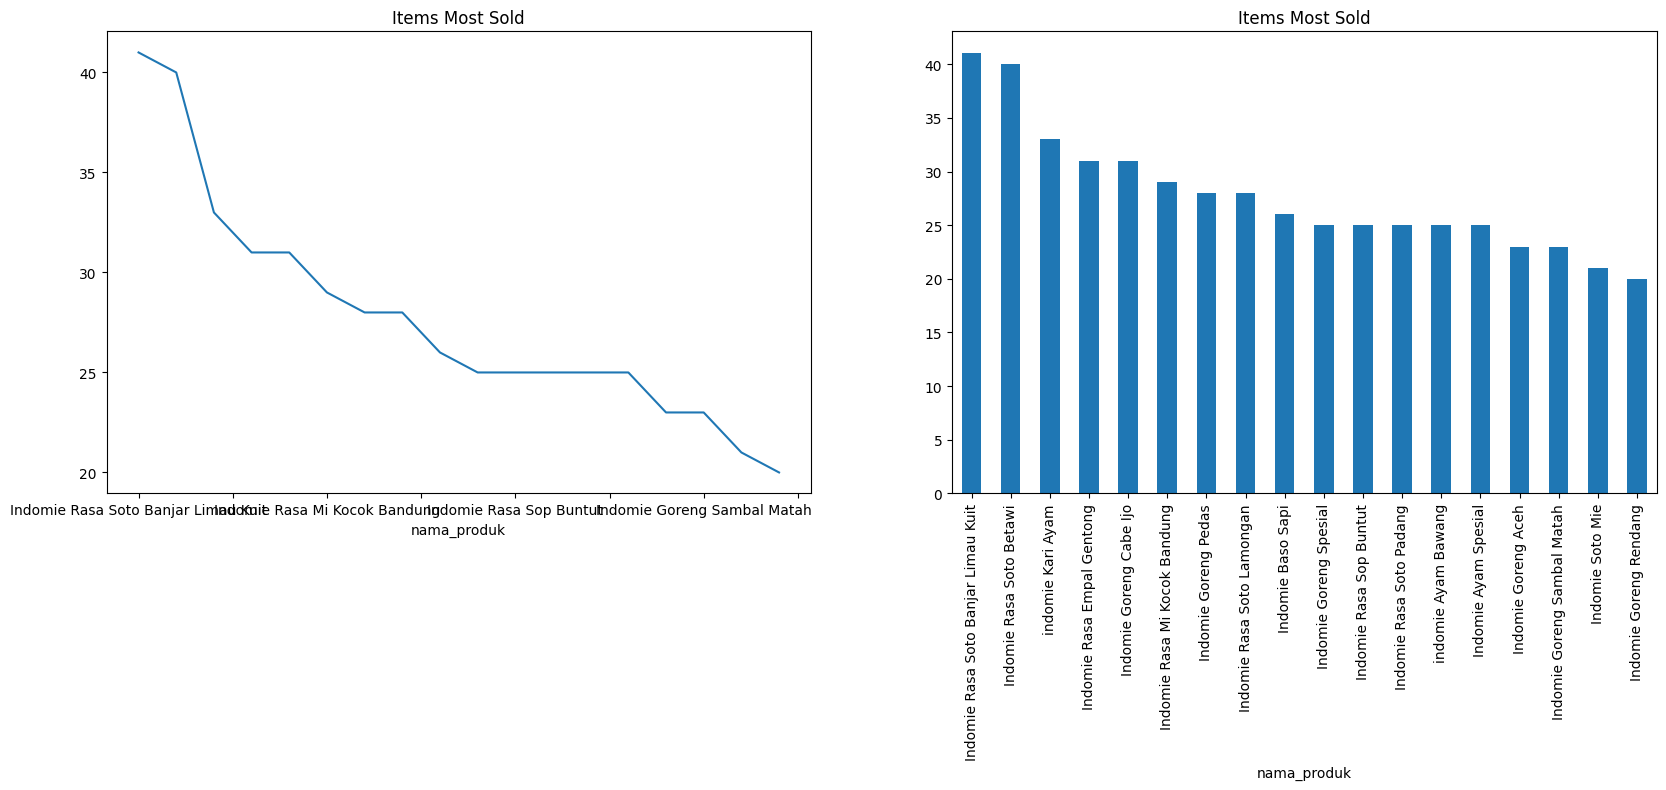

In [ ]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


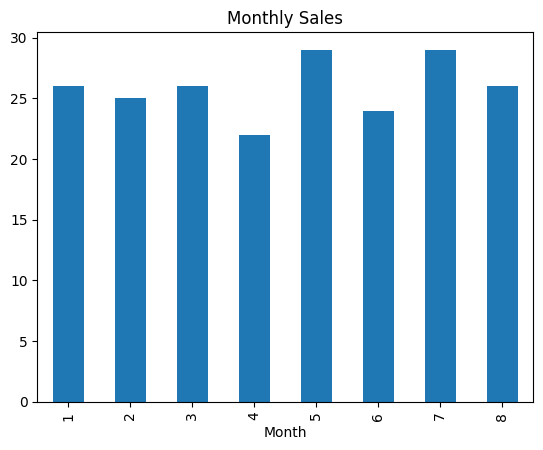

In [ ]:
data.groupby('Month')['tanggal_transaksi'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [ ]:
print(data.groupby('Month')['Day'].nunique())

Month
1    26
2    25
3    26
4    22
5    29
6    24
7    29
8    26
Name: Day, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
data2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in data['tanggal_transaksi'].unique():
    tlist = list(set(data[data['tanggal_transaksi']==i]['nama_produk']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


207


In [ ]:
frequent_itemsets = apriori(data2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=5.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
4,"(Indomie Soto Mie, Indomie Rasa Soto Betawi)",(Indomie Rasa Soto Padang),0.014493,1.000000,8.280000
5,(Indomie Rasa Soto Padang),"(Indomie Soto Mie, Indomie Rasa Soto Betawi)",0.014493,0.120000,8.280000
0,"(Indomie Rasa Soto Betawi, Indomie Rasa Mi Koc...",(Indomie Baso Sapi),0.014493,0.750000,7.056818
1,(Indomie Baso Sapi),"(Indomie Rasa Soto Betawi, Indomie Rasa Mi Koc...",0.014493,0.136364,7.056818
2,"(Indomie Rasa Mi Kocok Bandung, Indomie Rasa S...",(indomie Kari Ayam),0.014493,0.750000,5.008065
3,(indomie Kari Ayam),"(Indomie Rasa Mi Kocok Bandung, Indomie Rasa S...",0.014493,0.096774,5.008065


# Bagian Baru